## İş Problemi


* Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli geliştirilmesi istenmektedir. Modeli geliştirmeden önce gerekli olan veri analizi ve özellik mühendisliği adımlarını gerçekleştirmeniz beklenmektedir.




## Veri Seti Hikayesi

* Telco müşteri kaybı verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan hayali bir telekom şirketi hakkında bilgi içerir. Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu gösterir.

* 21 Değişken ve  7043 Gözlem den oluşmaktadır

## Değişkenler

* CustomerId:Müşteri İd’si
* Gender: Cinsiyet
* SeniorCitizen :Müşterinin yaşlı olup olmadığı (1, 0)
* Partner: Müşterinin bir ortağı olup olmadığı (Evet, Hayır)
* Dependents Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır
* tenure Müşterinin şirkette kaldığı ay sayısı
* PhoneService Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)
* MultipleLines Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)
* InternetService Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)
* OnlineSecurity Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* OnlineBackup Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* DeviceProtection Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* TechSupport Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)
* StreamingTV Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* StreamingMovies Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* Contract Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl)
* PaperlessBilling Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
* PaymentMethod Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))
* MonthlyCharges Müşteriden aylık olarak tahsil edilen tutar
* TotalCharges Müşteriden tahsil edilen toplam tutar
* Churn Müşterinin kullanıp kullanmadığı (Evet veya Hayır)

## Görev 1 : Keşifçi Veri Analizi

Adım 1: Genel resmi inceleyiniz.

Adım 2: Numerik ve kategorik değişkenleri yakalayınız.

Adım 3: Numerik ve kategorik değişkenlerin analizini yapınız.

Adım 4: Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre 
numerik değişkenlerin ortalaması)

Adım 5: Aykırı gözlem analizi yapınız.

Adım 6: Eksik gözlem analizi yapınız.

Adım 7: Korelasyon analizi yapınız.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#adım 1

In [3]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [11]:
check_df(df)

##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
##################### Head #####################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes  

In [39]:
# adım2 vs adım3

In [20]:
# Kategorik değerleri ayıralım listeye koyalım

In [12]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]

cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

cat_cols = cat_cols + num_but_cat


In [13]:
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [14]:
df[cat_cols].nunique()


customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

In [15]:
[col for col in df.columns if col not in cat_cols]


['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [17]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")


In [19]:
cat_summary(df,"gender")

        gender     Ratio
Male      3555  50.47565
Female    3488  49.52435
##########################################


In [24]:
# veriseti içindeki dağılımlarına baktım,şimdi tüm kategorik değerler için aynı işlemleri yapalım

In [23]:
for col in cat_cols:
    cat_summary(df, col)

            customerID     Ratio
7590-VHVEG           1  0.014198
3791-LGQCY           1  0.014198
6008-NAIXK           1  0.014198
5956-YHHRX           1  0.014198
5365-LLFYV           1  0.014198
...                ...       ...
9796-MVYXX           1  0.014198
2637-FKFSY           1  0.014198
1552-AAGRX           1  0.014198
4304-TSPVK           1  0.014198
3186-AJIEK           1  0.014198

[7043 rows x 2 columns]
##########################################
        gender     Ratio
Male      3555  50.47565
Female    3488  49.52435
##########################################
     Partner     Ratio
No      3641  51.69672
Yes     3402  48.30328
##########################################
     Dependents      Ratio
No         4933  70.041176
Yes        2110  29.958824
##########################################
     PhoneService      Ratio
Yes          6361  90.316626
No            682   9.683374
##########################################
                  MultipleLines      Ratio
No       

In [25]:
# fonksiyonumuzu görselleştirelim

In [26]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

        gender     Ratio
Male      3555  50.47565
Female    3488  49.52435
##########################################


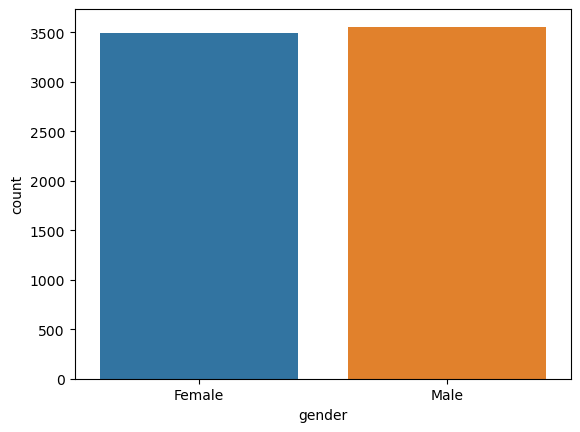

In [27]:
cat_summary(df, "gender", plot=True)


In [28]:
# sayısal değişkenler için analizler yapalım

In [29]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]
num_cols = [col for col in num_cols if col not in cat_cols]

In [30]:
num_cols

['MonthlyCharges']

In [31]:
# tek bir tane sayısal değişkenimiz var

In [32]:
def num_summary(dataframe, numerical_col):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)


In [33]:
num_summary(df, "MonthlyCharges")



count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


In [34]:
for col in num_cols:
    num_summary(df, col)


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


In [35]:
# görselleştirelim ;

In [36]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)



count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


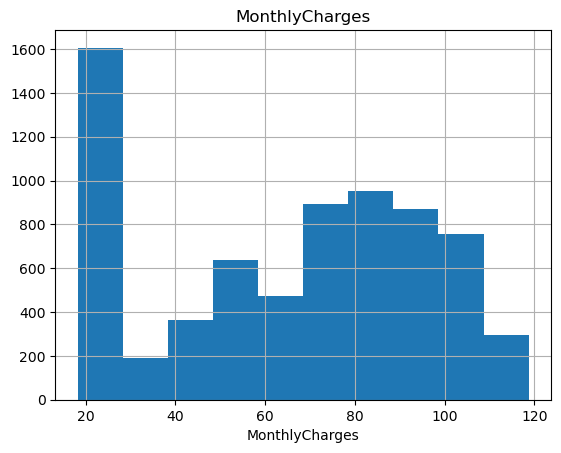

In [37]:

num_summary(df, "MonthlyCharges", plot=True)



count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


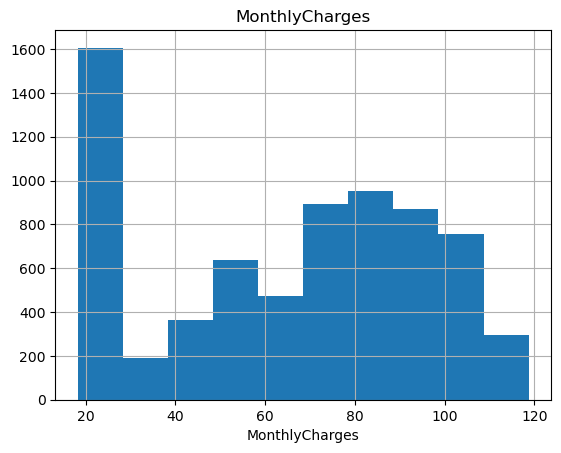

In [38]:
for col in num_cols:
    num_summary(df, col, plot=True)


In [40]:
# adım 4 hedef değişken analizi

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [42]:
cat_summary(df,"Churn")

     Churn      Ratio
No    5174  73.463013
Yes   1869  26.536987
##########################################


In [43]:
# Verilerimizin %73.46 sı Hayır etiketi yani dengesiz bir veriseti ile karşı karşıyayız

In [50]:
df.groupby("Churn")["MonthlyCharges"].mean()


Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [54]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


target_summary_with_num(df, "Churn","tenure")

          tenure
Churn           
No     37.569965
Yes    17.979133




In [55]:
# Adım 5: Aykırı gözlem analizi yapınız.


In [56]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [57]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [59]:
check_outlier(df,"MonthlyCharges")

False

In [60]:
# MonthlyCharges de aykırı değer yok (default değerler 25 e 75)

In [63]:
# aykırı değer problemini baskılama yöntemi ile çözelim

In [64]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [66]:
for col in num_cols:
    replace_with_thresholds(df, col)


In [65]:
# aykırı değer problemini çözmüş olduk

In [67]:
# Adım 6: Eksik gözlem analizi yapınız.


In [68]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [69]:
# verisetimizde eksik değer yok

In [70]:
# Adım 7: Korelasyon analizi yapınız.


C:\Users\İsmail ACAR\AppData\Local\Temp\ipykernel_19828\4223585204.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="RdBu",annot=True,fmt=".2f",linewidths=0.6)


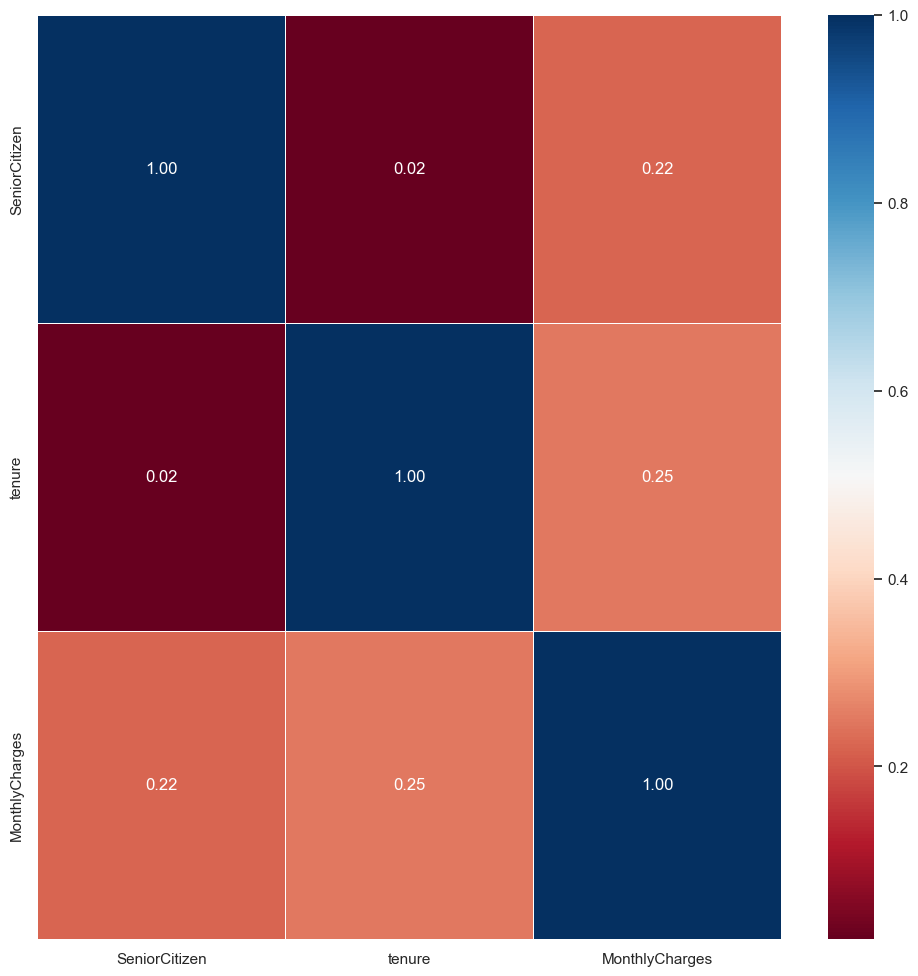

In [75]:
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(df.corr(), cmap="RdBu",annot=True,fmt=".2f",linewidths=0.6)
plt.show()

In [76]:
# değişkenler arasında yüksek korelasyon değeri yok